## Data transformation is 
```a common technique used in statistics and data analysis to modify the distribution or structure of data. It can help to meet the assumptions of statistical models, improve the interpretability of results, and address issues like nonlinearity, heteroscedasticity, and outliers.```

##### Three commonly used data transformations are `log transformation`, `exponential transformation` and `Box-Cox transformation.`

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox

In [20]:
df = pd.read_csv('Data.csv')

In [21]:
df.head()

,name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [22]:
def plot_num_column(df,feature):
    print(f"the skewness value of {feature} column = {df[feature].skew():.2f}")
    plt.title('Histgram')
    sns.histplot(data=df, x=feature, kde=True,bins=30)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    

the skewness value of Personal column = 1.74


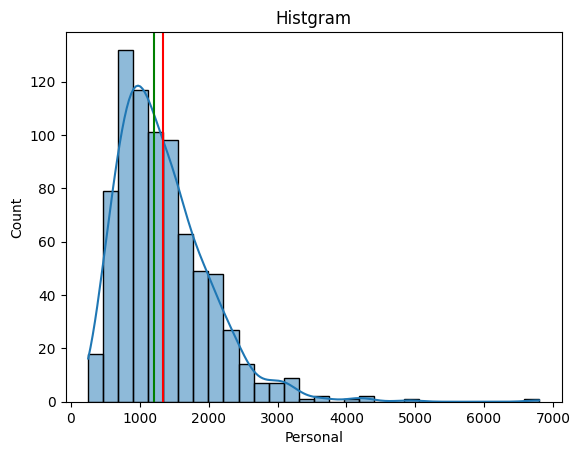

In [23]:
plot_num_column(df,'Personal')

### Log Transformation:
` The log transformation involves taking the logarithm of the values in a dataset.`

##### It's useful when:
- the data spans a large range.
- the relationship between variables appears to be exponential.
- The logarithm function compresses large values and expands small values, making the - -
- distribution more symmetrical.
- reducing the impact of extreme values.

the skewness value of Personal column = 1.74


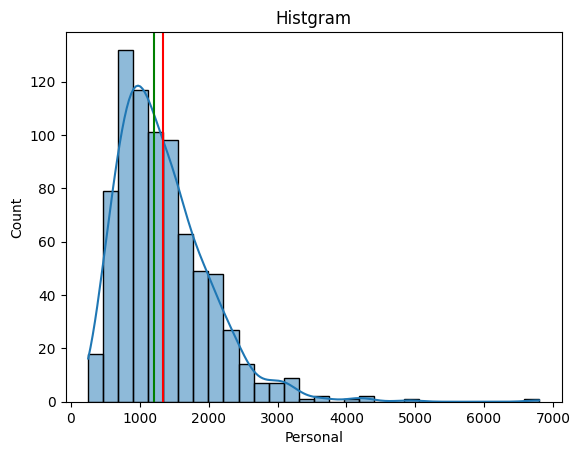

In [25]:
plot_num_column(df , 'Personal')

the skewness value of Personal column = -0.11


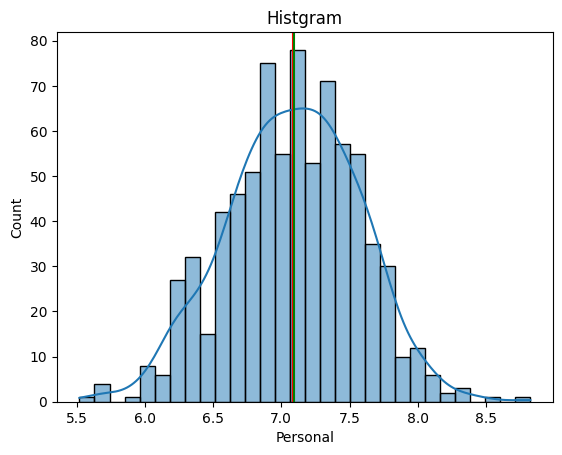

In [26]:
df_tmp=df.copy()
df_tmp['Personal']=np.log(df_tmp['Personal'])
# check
plot_num_column(df_tmp , 'Personal')

###  Square root transformation is
` primarily used to stabilize the variance of data and reduce skewness. `

##### It's useful when:

* the variability of the data increases with the mean, a common occurrence in many real-world datasets.
* the transformation compresses higher values and expands lower values, helping to create a more balanced and symmetric distribution.
reducing skewness.
``` The square root transformation is commonly applied to non-negative continuous variables. It is not appropriate for variables that contain negative values or zero. For data with a mix of positive and negative values, alternative transformations such as log transformation may be more suitable.```

In [14]:
df_sq=df.copy()

In [15]:
df_cp=df.copy()

In [16]:
df_sq['Personal']=np.sqrt(df_tmp['Personal'])

the skewness value of Personal column = 1.74


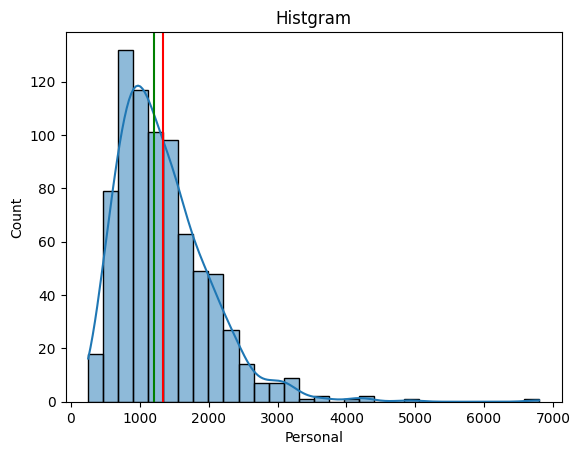

In [17]:
plot_num_column(df_cp,'Personal')

the skewness value of Personal column = 0.67


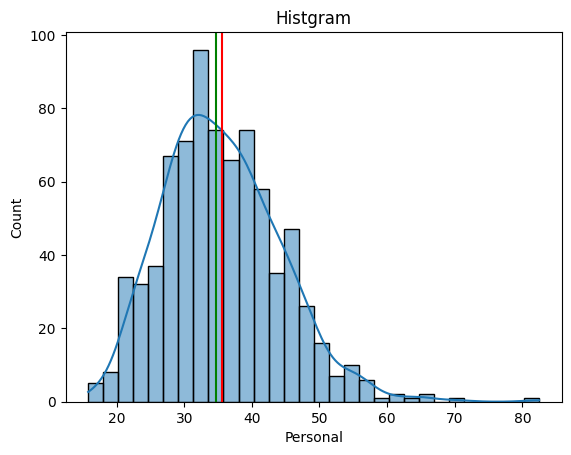

In [18]:
plot_num_column(df_sq,'Personal')

## Box-Cox Transformation:
` Imagine you have a dataset of monthly electricity consumption for households. The data may exhibit a skewed distribution with a long tail towards higher values. By applying a Box-Cox transformation, you can find the optimal power transformation that makes the data approximately normally distributed. This can help in fitting a linear regression model to identify factors that affect electricity consumption `


` Box-Cox tests all possible λ values and picks the one that makes the data most normal (least skewed, stabilized variance).`

the skewness value of Personal column = 1.74


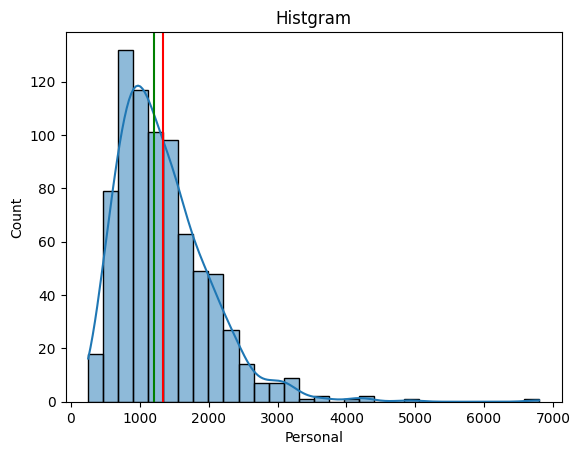

In [28]:
plot_num_column(df , 'Personal')

the skewness value of Personal column = -0.00


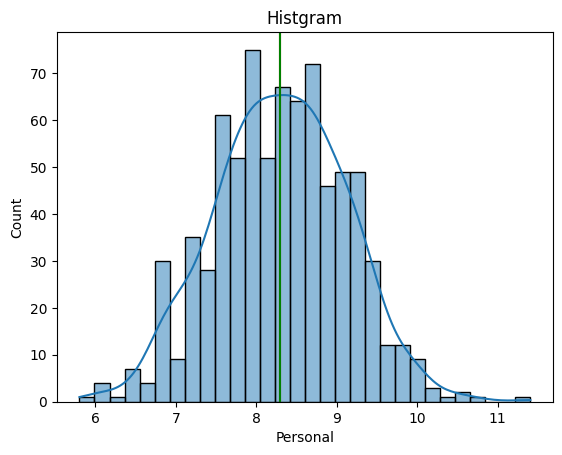

In [30]:
df_tmp=df.copy()
# Apply the Box-Cox transformation
col_bc ,_ ,_ = boxcox(df_tmp['Personal'],alpha=0.05)
df_tmp['Personal']=col_bc
plot_num_column(df_tmp , 'Personal')